# **TASK 1 - Web Scraping to Gain Company Insights**

### **Install Modules**

In [3]:
pip install BeautifulSoup4

In [4]:
pip install Requests

### **Import Packages**

In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

### **Data Scraping**

In [6]:
# Function for scraping review's header and text
def dataScrape(pages, page_size, div, Class):
  url1 = f"https://www.airlinequality.com/airline-reviews/british-airways"
  final_list = []

  for i in range(1, pages + 1):
    url = f"{url1}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    def getData(url):
      r = requests.get(url)
      return r.text

    def html_code(url):
      htmlData = getData(url)
      soup = BeautifulSoup(htmlData, 'html.parser')
      return (soup)

    soup = html_code(url)

    def dataList(soup):
      data_str = ""
      for item in soup.find_all(div, class_ = Class):
        data_str += item.get_text()
        final_list.append(data_str)
        data_str = ""
      return final_list

    columns = dataList(soup)
  return columns

In [7]:
# Function for scraping per category
def dataScrape2(pages, page_size, classes):
  url1 = f"https://www.airlinequality.com/airline-reviews/british-airways"
  final_list = []

  for i in range(1, pages + 1):
    url = f"{url1}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    def getData(url):
      r = requests.get(url)
      return r.text

    def html_code(url):
      htmlData = getData(url)
      soup = BeautifulSoup(htmlData, 'html.parser')
      return (soup)

    soup = html_code(url)

    def dataList(soup):
      data_str = ""
      for item in soup.find_all('td', class_ = 'review-value'):
        data_str += item.get_text()
        if any(substring in data_str for substring in classes):
          final_list.append(data_str)
        data_str = ""
      return final_list

    columns = dataList(soup)
  return columns

In [8]:
# Getting customer review's seat type
seat = dataScrape2(pages = 20, page_size = 100, classes = ["Class",  "Premium"])

# Getting customer review's date
months = dataScrape2(pages = 20, page_size = 100, classes = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"])

In [9]:
# Getting the review's header
rev_header = dataScrape(20, 100, 'h2', 'text_header')

# Getting the customer's review
rev_list = dataScrape(20, 100, 'div', 'text_content')

In [10]:
# Web scraping result
table = {'Review Header' : rev_header, 'Customers Review' : rev_list, 'Seat Type' : seat, 'Date' : months}
data = pd.DataFrame(table)
data.head()

,Review Header,Customers Review,Seat Type,Date
0,“VERY uncomfortable seats”,✅ Trip Verified | If you can’t fly First Class...,Economy Class,July 2024
1,"""substandard business class experience""",Not Verified | Singapore to Heathrow. Busine...,Business Class,July 2024
2,"""Customer Service is shocking""",Not Verified | I reported my damaged/ruined ...,Economy Class,June 2024
3,"""left me extremely disappointed""","Not Verified | On March 1st, I flew from Ber...",Economy Class,March 2024
4,“customer service was awful”,Not Verified | The WORST customer experience! ...,Economy Class,September 2023


### **Cleaning Data**

In [11]:
# Removing "Not Verified" and "Verified" in Customers Review
new = data['Customers Review'].str.split('|', n=1, expand = True)
data['Customers Reviews'] = new[1]
data.drop(columns =["Customers Review"], inplace = True)

In [12]:
# Removing reviews with empty value
data["Customers Reviews"].fillna("EMPTY VALUE", inplace = True)
data = data[data["Customers Reviews"].str.contains("EMPTY VALUE") == False]

In [13]:
# Removing stop words
nltk.download('punkt')
nltk.download('stopwords')
stp_words = stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

data['Customers Reviews'] = data['Customers Reviews'].apply(clean_review)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# Replacing symbols
data['Customers Reviews'] = data['Customers Reviews'].str.replace("[^a-zA-Z#]", " ")

# Converting reviews to lower-case
data['Customers Reviews'] = data['Customers Reviews'].str.casefold()

In [15]:
# Cleaning data result
data.head()

,Review Header,Seat Type,Date,Customers Reviews
0,“VERY uncomfortable seats”,Economy Class,July 2024,if can’t fly first class don’t fly british air...
1,"""substandard business class experience""",Business Class,July 2024,singapore heathrow. business class a380-800 pr...
2,"""Customer Service is shocking""",Economy Class,June 2024,i reported damaged/ruined suitcase 5 weeks ago...
3,"""left me extremely disappointed""",Economy Class,March 2024,"on march 1st, i flew berlin são paulo ba encou..."
4,“customer service was awful”,Economy Class,September 2023,the worst customer experience! british airways...


### **Sentiment Analysis**

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
data['polarity'] = data['Customers Reviews'].apply(lambda x: analyzer.polarity_scores(x))
data = pd.concat(
    [data.drop(['polarity'], axis=1),
     data['polarity'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [93]:
data.head()

,Review Header,Seat Type,Date,Customers Reviews,neg,neu,pos,compound,tagged,Result,Month,Year
0,“VERY uncomfortable seats”,Economy Class,July 2024,if can’t fly first class don’t fly british air...,0.252,0.710,0.038,-0.9543,"[(if, IN), (can, MD), (’, VB), (t, VB), (fly, ...",Negative,July,2024
1,"""substandard business class experience""",Business Class,July 2024,singapore heathrow. business class a380-800 pr...,0.107,0.804,0.089,-0.2732,"[(singapore, RB), (heathrow, NN), (., .), (bus...",Negative,July,2024
2,"""Customer Service is shocking""",Economy Class,June 2024,i reported damaged/ruined suitcase 5 weeks ago...,0.076,0.817,0.107,0.2732,"[(i, NN), (reported, VBD), (damaged/ruined, JJ...",Neutral,June,2024
3,"""left me extremely disappointed""",Economy Class,March 2024,"on march 1st, i flew berlin são paulo ba encou...",0.152,0.825,0.023,-0.9167,"[(on, IN), (march, NN), (1st, CD), (,, ,), (i,...",Negative,March,2024
4,“customer service was awful”,Economy Class,September 2023,the worst customer experience! british airways...,0.232,0.582,0.186,-0.6952,"[(the, DT), (worst, JJS), (customer, NN), (exp...",Negative,September,2023


In [18]:
# Tokenizing reviews
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
data['tokenized'] = data['Customers Reviews'].str.lower().apply(nltk.word_tokenize)
data['tagged'] = data['tokenized'].apply(nltk.pos_tag)
del data['tokenized']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [92]:
data.head()

,Review Header,Seat Type,Date,Customers Reviews,neg,neu,pos,compound,tagged,Result,Month,Year
0,“VERY uncomfortable seats”,Economy Class,July 2024,if can’t fly first class don’t fly british air...,0.252,0.710,0.038,-0.9543,"[(if, IN), (can, MD), (’, VB), (t, VB), (fly, ...",Negative,July,2024
1,"""substandard business class experience""",Business Class,July 2024,singapore heathrow. business class a380-800 pr...,0.107,0.804,0.089,-0.2732,"[(singapore, RB), (heathrow, NN), (., .), (bus...",Negative,July,2024
2,"""Customer Service is shocking""",Economy Class,June 2024,i reported damaged/ruined suitcase 5 weeks ago...,0.076,0.817,0.107,0.2732,"[(i, NN), (reported, VBD), (damaged/ruined, JJ...",Neutral,June,2024
3,"""left me extremely disappointed""",Economy Class,March 2024,"on march 1st, i flew berlin são paulo ba encou...",0.152,0.825,0.023,-0.9167,"[(on, IN), (march, NN), (1st, CD), (,, ,), (i,...",Negative,March,2024
4,“customer service was awful”,Economy Class,September 2023,the worst customer experience! british airways...,0.232,0.582,0.186,-0.6952,"[(the, DT), (worst, JJS), (customer, NN), (exp...",Negative,September,2023


In [91]:
# Sentiment Analysis Result
data.loc[data['compound'] < 0, 'Result'] = 'Negative'
data.loc[data['compound'] >= 0.5, 'Result'] = 'Positive'
data.loc[(data['compound'] >= 0) & (data['compound'] < 0.5), 'Result'] = 'Neutral'
data.head()

,Review Header,Seat Type,Date,Customers Reviews,neg,neu,pos,compound,tagged,Result,Month,Year
0,“VERY uncomfortable seats”,Economy Class,July 2024,if can’t fly first class don’t fly british air...,0.252,0.710,0.038,-0.9543,"[(if, IN), (can, MD), (’, VB), (t, VB), (fly, ...",Negative,July,2024
1,"""substandard business class experience""",Business Class,July 2024,singapore heathrow. business class a380-800 pr...,0.107,0.804,0.089,-0.2732,"[(singapore, RB), (heathrow, NN), (., .), (bus...",Negative,July,2024
2,"""Customer Service is shocking""",Economy Class,June 2024,i reported damaged/ruined suitcase 5 weeks ago...,0.076,0.817,0.107,0.2732,"[(i, NN), (reported, VBD), (damaged/ruined, JJ...",Neutral,June,2024
3,"""left me extremely disappointed""",Economy Class,March 2024,"on march 1st, i flew berlin são paulo ba encou...",0.152,0.825,0.023,-0.9167,"[(on, IN), (march, NN), (1st, CD), (,, ,), (i,...",Negative,March,2024
4,“customer service was awful”,Economy Class,September 2023,the worst customer experience! british airways...,0.232,0.582,0.186,-0.6952,"[(the, DT), (worst, JJS), (customer, NN), (exp...",Negative,September,2023


### **Creating Summary**

In [21]:
# Number of reviews based on sentiment
data['Result'].value_counts()

Result
Positive    969
Negative    807
Neutral     223
Name: count, dtype: int64

In [22]:
# Economy Class' customer review based on sentiment
df_Economy = data[(data['Seat Type'] == "Economy Class") & (data['Result'])]
df_Economy['Result'].value_counts()

Result
Negative    510
Positive    470
Neutral     134
Name: count, dtype: int64

In [23]:
# Business Class' customer review based on sentiment
df_Business = data[(data['Seat Type'] == "Business Class") & (data['Result'])]
df_Business['Result'].value_counts()

Result
Positive    361
Negative    215
Neutral      62
Name: count, dtype: int64

In [24]:
# First Class' customer review based on sentiment
df_First = data[(data['Seat Type'] == "First Class") & (data['Result'])]
df_First['Result'].value_counts()

Result
Positive    50
Negative    16
Neutral      6
Name: count, dtype: int64

In [25]:
# Premium Economy Class' customer review based on sentiment
df_PremiumEcon = data[(data['Seat Type'] == "Premium Economy") & (data['Result'])]
df_PremiumEcon['Result'].value_counts()

Result
Positive    88
Negative    66
Neutral     21
Name: count, dtype: int64

In [90]:
# Splitting month and year from "Date" column
data[['Month','Year']] = data.Date.str.split(expand=True)
data.head()

,Review Header,Seat Type,Date,Customers Reviews,neg,neu,pos,compound,tagged,Result,Month,Year
0,“VERY uncomfortable seats”,Economy Class,July 2024,if can’t fly first class don’t fly british air...,0.252,0.710,0.038,-0.9543,"[(if, IN), (can, MD), (’, VB), (t, VB), (fly, ...",Negative,July,2024
1,"""substandard business class experience""",Business Class,July 2024,singapore heathrow. business class a380-800 pr...,0.107,0.804,0.089,-0.2732,"[(singapore, RB), (heathrow, NN), (., .), (bus...",Negative,July,2024
2,"""Customer Service is shocking""",Economy Class,June 2024,i reported damaged/ruined suitcase 5 weeks ago...,0.076,0.817,0.107,0.2732,"[(i, NN), (reported, VBD), (damaged/ruined, JJ...",Neutral,June,2024
3,"""left me extremely disappointed""",Economy Class,March 2024,"on march 1st, i flew berlin são paulo ba encou...",0.152,0.825,0.023,-0.9167,"[(on, IN), (march, NN), (1st, CD), (,, ,), (i,...",Negative,March,2024
4,“customer service was awful”,Economy Class,September 2023,the worst customer experience! british airways...,0.232,0.582,0.186,-0.6952,"[(the, DT), (worst, JJS), (customer, NN), (exp...",Negative,September,2023


In [27]:
# Number of reviews per month
per_Month = pd.DataFrame(data.groupby(["Month","Result"])["Result"].count())
per_Month = per_Month.rename(columns={'Result': 'Count'})
per_Month = per_Month.pivot_table(index='Month', columns='Result', values='Count', fill_value=0)

# Reordered index
order = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
per_Month2 = pd.DataFrame(per_Month.reindex(order))

# Rename month into its abbreviation
abbrv = []
for i in order:
  abbrv.append(i[0:3])

newName = dict(zip(order, abbrv))

per_Month2 = per_Month2.rename(index=newName)
per_Month2

Result,Negative,Neutral,Positive
Month,,,
Jan,65,18,85
Feb,70,17,76
Mar,77,29,99
Apr,80,20,78
May,75,16,85
Jun,83,21,89
Jul,56,22,77
Aug,73,8,58
Sep,58,14,81


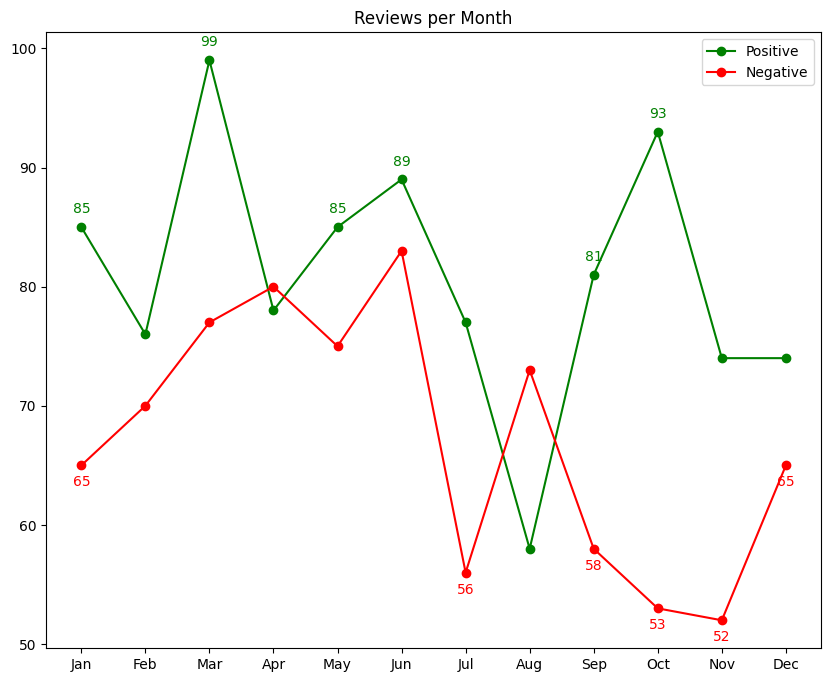

In [37]:
# Create a plot

plt.figure(figsize=(10,8))
plt.title('Reviews per Month')
plt.plot(per_Month2.index, per_Month2['Positive'], label = "Positive", color = 'green', marker = 'o')
plt.plot(per_Month2.index, per_Month2['Negative'], label = "Negative", color = 'red', marker = 'o')
plt.legend()

posReview = per_Month2[(per_Month2['Positive'] > per_Month2['Positive'].mean())]

for x,y in zip(posReview.index,posReview['Positive']):
    plt.annotate(y, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', color = 'green') # horizontal alignment can be left, right or center

negReview = per_Month2[(per_Month2['Negative'] < per_Month2['Negative'].mean())]

for x1,y1 in zip(negReview.index,negReview['Negative']):
    plt.annotate(y1, # this is the text
                 (x1,y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center', color = 'red') # horizontal alignment can be left, right or center

In [30]:
# Number of reviews per year
per_Year = pd.DataFrame(data.groupby(["Year","Result"])["Result"].count())
per_Year = per_Year.rename(columns={'Result': 'Count'})
per_Year = per_Year.pivot_table(index='Year', columns='Result', values='Count', fill_value=0)
per_Year

Result,Negative,Neutral,Positive
Year,,,
2016,12,0,6
2017,204,63,274
2018,108,34,195
2019,125,35,176
2020,39,16,39
2021,39,10,44
2022,94,25,98
2023,146,33,98
2024,40,7,39


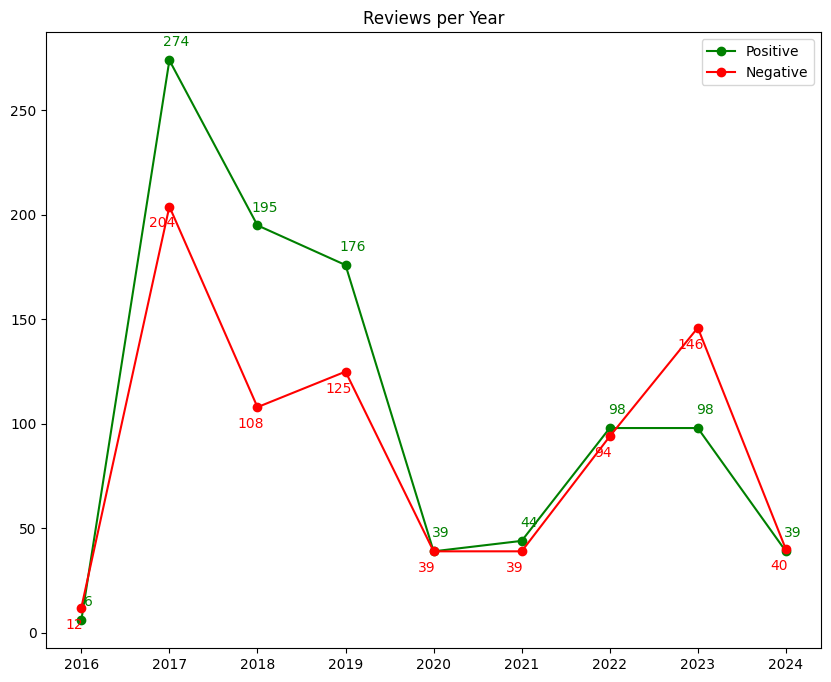

In [40]:
# Create a plot

plt.figure(figsize=(10,8))
plt.title('Reviews per Year')
plt.plot(per_Year.index, per_Year['Positive'], label = "Positive", color = 'green', marker = 'o')
plt.plot(per_Year.index, per_Year['Negative'], label = "Negative", color = 'red', marker = 'o')
plt.legend()

for X,Y in zip(per_Year.index,per_Year['Positive']):
    plt.annotate(Y, # this is the text
                 (X,Y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(5,10), # distance from text to points (x,y)
                 ha='center', color = 'green') # horizontal alignment can be left, right or center

for X1,Y1 in zip(per_Year.index,per_Year['Negative']):
    plt.annotate(Y1, # this is the text
                 (X1,Y1), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-5,-15), # distance from text to points (x,y)
                 ha='center', color = 'red') # horizontal alignment can be left, right or center

In [32]:
pip install wordcloud

In [33]:
# Split review into word categories
adj = []
noun = []
adv = []
verb = []
for i in data['tagged']:
  for j in i:
    if 'JJ' in j[1]:
      adj.append(j[0])
    elif 'RB' in j[1]:
      adv.append(j[0])
    elif 'V' in j[1]:
      verb.append(j[0])

# Delete most common and irrelevant words
unwanted = {'london', 'british', 'ba'}
adj = [x for x in adj if x not in unwanted]

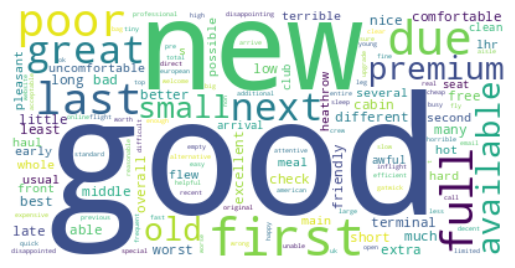

In [41]:
# Create a wordcloud from adjective words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(str(v) for v in adj)

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **TASK 2 - Predicting customer buying behavior**


### **Extracting Data**

In [88]:
import pandas as pd
url = "https://raw.githubusercontent.com/feliceelena/OnlineRetail_II/main/customer_booking.csv"
df = pd.read_csv(url, encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### **Data Exploration and Cleaning Data**

In [50]:
# Observe country names in "booking_origin" column
df.booking_origin.unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [63]:
# Create dummy variables for categorial variable
df = pd.get_dummies(df, columns = ['sales_channel', 'trip_type', 'flight_day'])

# Delete column and rows
del df['route']
# df = df[(df['booking_origin'] != '(not set)')]
df = df[(df.booking_origin != '(not set)') & (df.booking_origin != 'Timor-Leste')]


# Rename columns
df = df.replace(["Myanmar (Burma)", "Svalbard & Jan Mayen"], ["Myanmar", "Norway"])

# Final country list
print("Total countries:", len(df.booking_origin.unique()))
df.booking_origin.unique()

Total countries: 101


array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', 'Saudi Arabia', 'Netherlands', 'Qatar',
       'Hong Kong', 'Philippines', 'Sri Lanka', 'France', 'Croatia',
       'United States', 'Laos', 'Hungary', 'Portugal', 'Cyprus',
       'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman', 'Bangladesh',
       'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan', 'Brunei',
       'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia', 'Iran',
       'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius', 'Nepal',
       'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria', 'Lebanon',
       'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania', 'Peru',
       'Argentina', 'New Caledonia', 'Macau', 'Myanmar', 'Norway',
       'Panama', 'Bhutan

In [52]:
pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 15.1 MB/s eta 0:00:00


In [64]:
# Replace country name into continent name
import pycountry_convert as pc

def country_to_continent(country_name):
  list = []
  for i in country_name:

    country_alpha2 = pc.country_name_to_country_alpha2(i)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)

    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    list.append(country_continent_name)
  return list

df['continent'] = country_to_continent(df['booking_origin'])
del df['booking_origin']

df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,trip_type_OneWay,trip_type_RoundTrip,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,continent
0,2,262,19,7,1,0,0,5.52,0,True,...,False,True,False,False,True,False,False,False,False,Oceania
1,1,112,20,3,0,0,0,5.52,0,True,...,False,True,False,False,True,False,False,False,False,Oceania
2,2,243,22,17,1,1,0,5.52,0,True,...,False,True,False,False,False,False,False,False,True,Asia
3,1,96,31,4,0,0,1,5.52,0,True,...,False,True,False,False,True,False,False,False,False,Oceania
4,2,68,22,15,1,0,1,5.52,0,True,...,False,True,False,False,False,False,False,False,True,Asia


In [65]:
# Final continents list
print("Total continents:", len(df.continent.unique()))
print(df.continent.unique())

# Create dummy variable for "continents"
df = pd.get_dummies(df, columns = ['continent'])

Total continents: 6
['Oceania' 'Asia' 'Europe' 'Africa' 'North America' 'South America']


In [68]:
# Columns name and data types
df.dtypes

num_passengers               int64
purchase_lead                int64
length_of_stay               int64
flight_hour                  int64
wants_extra_baggage          int64
wants_preferred_seat         int64
wants_in_flight_meals        int64
flight_duration            float64
booking_complete             int64
sales_channel_Internet        bool
sales_channel_Mobile          bool
trip_type_CircleTrip          bool
trip_type_OneWay              bool
trip_type_RoundTrip           bool
flight_day_Fri                bool
flight_day_Mon                bool
flight_day_Sat                bool
flight_day_Sun                bool
flight_day_Thu                bool
flight_day_Tue                bool
flight_day_Wed                bool
continent_Africa              bool
continent_Asia                bool
continent_Europe              bool
continent_North America       bool
continent_Oceania             bool
continent_South America       bool
dtype: object

In [69]:
# Standardize numerical variable

import scipy
from scipy import stats

df['purchase_lead'] = stats.zscore(df['purchase_lead'])
df['length_of_stay'] = stats.zscore(df['length_of_stay'])
df['flight_hour'] = stats.zscore(df['flight_hour'])
df['flight_duration'] = stats.zscore(df['flight_duration'])
df['num_passengers'] = stats.zscore(df['num_passengers'])

# Rename boolean variables
df = df.replace({True: 1, False: 0})

### **Creating Logistic Regression Model**

In [82]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the breast cancer dataset
X = df.drop(['booking_complete'], axis = 1)
y = df['booking_complete']

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

# LogisticRegression
model = LogisticRegression(random_state=0, max_iter = 1)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy:", acc)

Logistic Regression model accuracy: 0.8484423519983972


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Feature Importance**

<Axes: ylabel='Feature'>

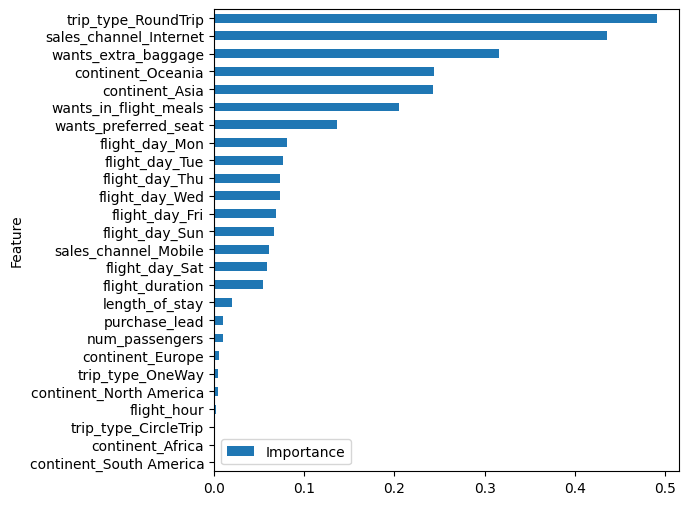

In [85]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(6, 6))